### MLP Model 4 (100-256-1) using STFT Dataset

In [1]:
#Importing essential libraries
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import random 
import math
import pandas as pd

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling1D,Flatten,Dense,Dropout,BatchNormalization, GRU, LSTM, RNN
from tensorflow.keras import regularizers as reg

import tensorflow as tf
from tensorflow import keras
import pickle

In [2]:
# Importing the Training data from pickle file 
pickle_in = open("X_train_T2.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train_T2.pickle","rb")
y_train = pickle.load(pickle_in)

In [3]:
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)

X_train : (4431, 100)
y_train : (4431,)


In [4]:
X_train=X_train.replace([np.inf, -np.inf, np.nan], 0)

In [ ]:
#Min Max Scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [ ]:
#Adaptive Learning Rate
# from tensorflow.keras.callbacks import LearningRateScheduler
# def step_decay(epoch):
#    initial_lrate = 0.01 #Setting the initial learning rate to 0.001 
#    drop = 0.5
#    epochs_drop = 5.0  #Drops the learning rate to half after every 10 epochs
#    lrate = initial_lrate * math.pow(drop,  
#            math.floor((1+epoch)/epochs_drop))
#    return lrate
# lrate = LearningRateScheduler(step_decay)

In [5]:
# In Model 4 , the complexity is decreased by reducing the no. of hidden layers compared to its previous models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(100,input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1,activation='linear'))

# Compile the network :
#sgd = SGD(learning_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
NN_model.summary()
early_stopping_monitor = EarlyStopping(patience=20)
callbacks_list = [early_stopping_monitor]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 36,213
Trainable params: 36,213
Non-trainable params: 0
_________________________________________________________________


In [6]:
NN_model.fit(X_train, y_train, epochs=250, batch_size=1, validation_split = 0.02 , callbacks=callbacks_list )

Epoch 1/250
4342/4342 [==============================] - 6s 1ms/step - loss: 12040833.0000 - mean_absolute_error: 12040833.0000 - val_loss: 9204483.0000 - val_mean_absolute_error: 9204483.0000
Epoch 2/250
4342/4342 [==============================] - 6s 1ms/step - loss: 8716799.0000 - mean_absolute_error: 8716799.0000 - val_loss: 8205384.5000 - val_mean_absolute_error: 8205384.5000
Epoch 3/250
4342/4342 [==============================] - 6s 1ms/step - loss: 7635303.0000 - mean_absolute_error: 7635303.0000 - val_loss: 7697489.5000 - val_mean_absolute_error: 7697489.5000
Epoch 4/250
4342/4342 [==============================] - 6s 1ms/step - loss: 6907517.0000 - mean_absolute_error: 6907517.0000 - val_loss: 7171529.5000 - val_mean_absolute_error: 7171529.5000
Epoch 5/250
4342/4342 [==============================] - 6s 1ms/step - loss: 6429683.5000 - mean_absolute_error: 6429683.5000 - val_loss: 6938056.5000 - val_mean_absolute_error: 6938056.5000
Epoch 6/250
4342/4342 [====================

Epoch 44/250
4342/4342 [==============================] - 7s 2ms/step - loss: 2927398.2500 - mean_absolute_error: 2927398.2500 - val_loss: 4037490.7500 - val_mean_absolute_error: 4037490.7500
Epoch 45/250
4342/4342 [==============================] - 8s 2ms/step - loss: 2914613.2500 - mean_absolute_error: 2914613.2500 - val_loss: 3572637.7500 - val_mean_absolute_error: 3572637.7500
Epoch 46/250
4342/4342 [==============================] - 8s 2ms/step - loss: 2867042.2500 - mean_absolute_error: 2867042.2500 - val_loss: 3961566.5000 - val_mean_absolute_error: 3961566.5000
Epoch 47/250
4342/4342 [==============================] - 9s 2ms/step - loss: 2832124.0000 - mean_absolute_error: 2832124.0000 - val_loss: 4004371.5000 - val_mean_absolute_error: 4004371.5000
Epoch 48/250
4342/4342 [==============================] - 7s 1ms/step - loss: 2814956.7500 - mean_absolute_error: 2814956.7500 - val_loss: 3934401.0000 - val_mean_absolute_error: 3934401.0000
Epoch 49/250
4342/4342 [================

Epoch 87/250
4342/4342 [==============================] - 7s 2ms/step - loss: 2189191.0000 - mean_absolute_error: 2189191.0000 - val_loss: 3567263.2500 - val_mean_absolute_error: 3567263.2500
Epoch 88/250
4342/4342 [==============================] - 8s 2ms/step - loss: 2174453.7500 - mean_absolute_error: 2174453.7500 - val_loss: 3659566.7500 - val_mean_absolute_error: 3659566.7500
Epoch 89/250
4342/4342 [==============================] - 7s 2ms/step - loss: 2190816.0000 - mean_absolute_error: 2190816.0000 - val_loss: 3546163.7500 - val_mean_absolute_error: 3546163.7500s - loss: 21497
Epoch 90/250
4342/4342 [==============================] - 8s 2ms/step - loss: 2119397.2500 - mean_absolute_error: 2119397.2500 - val_loss: 4181949.0000 - val_mean_absolute_error: 4181949.0000
Epoch 91/250
4342/4342 [==============================] - 8s 2ms/step - loss: 2163837.0000 - mean_absolute_error: 2163837.0000 - val_loss: 3376685.0000 - val_mean_absolute_error: 3376685.0000
Epoch 92/250
4342/4342 [=

In [7]:
#Saving the model for Ensembling
filename = 'model_F5T2.h5'
NN_model.save(filename)

In [8]:
def plotfig (ypred, yactual, strtitle, y_max):
    plt.scatter(ypred, yactual.values.ravel())
    plt.title(strtitle)
    plt.plot([(0, 0), (y_max, y_max)], [(0, 0), (y_max, y_max)])
    plt.xlim(0, y_max)
    plt.ylim(0, y_max)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()

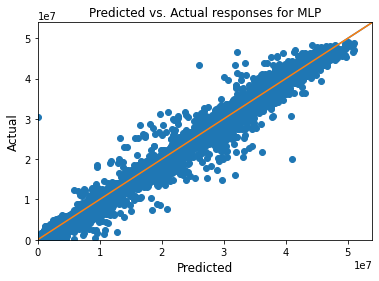

In [9]:
#Best fit line for Training data 
plotfig(NN_model.predict(X_train), y_train, 'Predicted vs. Actual responses for MLP', max(y_train) + 0.1*max(y_train))

In [10]:
#Importing the test data  
pickle_in = open("X_test_T2.pickle","rb")
X_test = pickle.load(pickle_in)

In [11]:
predictions = NN_model.predict(X_test)
print(predictions)

[[11420089.]
 [38088932.]
 [23140762.]
 ...
 [27592338.]
 [42383480.]
 [18445656.]]


In [12]:
predictions.shape

(4520, 1)

In [13]:
testsub =  pd.read_csv('C:/Datasets/predict-volcanic-eruptions-ingv-oe/sample_submission.csv')

In [14]:
#Creating Submission file to kaggle
submission = pd.DataFrame()
submission['segment_id'] = testsub['segment_id']
submission['time_to_eruption'] = predictions
submission.to_csv('submission_MLP_121320_F5T2.csv', header=True, index=False)